### unzipping the dataset file.
! unzip '/content/drive/MyDrive/mnist.zip' -d '/content/sample_data'

In [1]:
import os
from os import listdir
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns
from PIL import Image

In [3]:
for i in range(65,91):
  size = len(os.listdir ('/content/sample_data/New folder/'+chr(i)))
  print(chr(i),":",size)

A : 13870
B : 8668
C : 23409
D : 10134
E : 11440
F : 1163
G : 5762
H : 7218
I : 1120
J : 8493
K : 5603
L : 11586
M : 12336
N : 19010
O : 57825
P : 19341
Q : 5812
R : 11566
S : 48419
T : 22495
U : 29008
V : 4182
W : 10784
X : 6272
Y : 10859
Z : 6076


In [2]:
directory = "/content/sample_data/New folder"
image = []
label = []
for item in os.listdir(directory):
  folder_dir = os.path.join(directory, item)
  for i in os.listdir(folder_dir):
    img = Image.open(os.path.join(folder_dir, i))
    image.append(img)
    label.append(i[0])

### Checking the Properties of the Images using PIL Librarby

In [4]:
print(image[0].size) # (width, Height in pixels)

print(image[0].filename)

print(image[0].format)

print(image[0].mode)

(28, 28)
/content/sample_data/New folder/C/C-15937.png
PNG
L


### Resizing the Images

In [5]:
img_resized=[]
for i in image:
   i.thumbnail((20,20))
   img_resized.append(i)

In [6]:
pixels=[]
for i in img_resized:
  pixels.append(list(np.array(i).ravel())) 

### Converting the DataFrame

In [7]:
mnist_df = pd.DataFrame(pixels)
mnist_df["label"] = label

In [8]:
mnist_df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,J
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,J
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,J
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,J


In [9]:
mnist_df.to_csv("/content/drive/MyDrive/mnist.csv", index=False)

In [10]:
# Reading the file using pandas
image_df = pd.read_csv('/content/drive/MyDrive/mnist.csv')

### Properties of the dataframe

In [11]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Columns: 401 entries, 0 to label
dtypes: int64(400), object(1)
memory usage: 1.1+ GB


In [12]:
image_df.shape

(372451, 401)

In [13]:
image_df.label.value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: label, dtype: int64

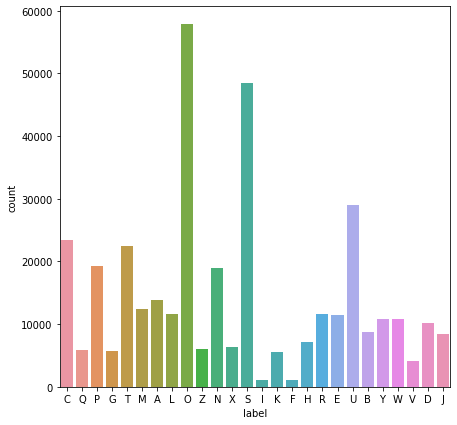

In [14]:
plt.figure(figsize=(7,7))
sns.countplot(data=image_df, x='label');

### Separating the Input and Output Variables

In [15]:
X = image_df.drop(['label'], axis=1)

y = image_df['label']

In [16]:
X

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


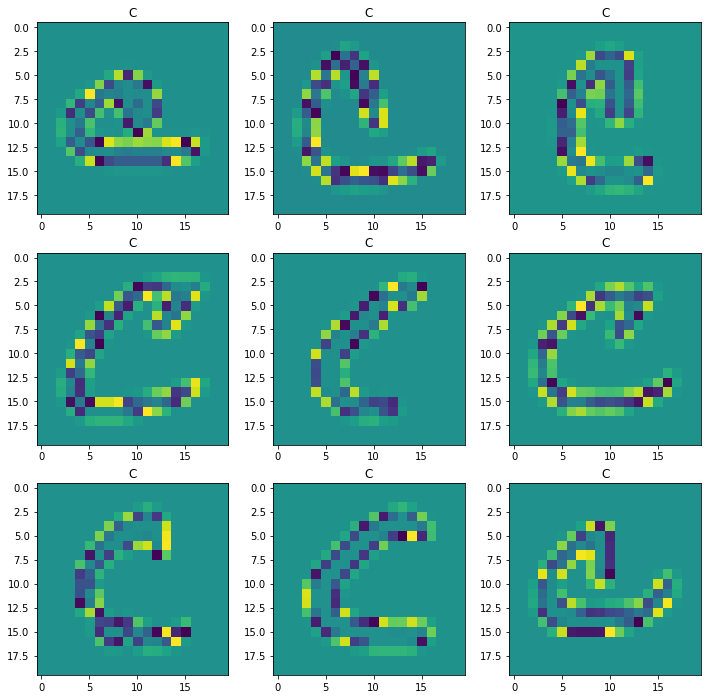

In [17]:
plt.figure(figsize=(12, 12))
val = np.random.randint(0, 1796, 9)

for i in range(len(val)):
    plt.subplot(3, 3, i+1)
    plt.title(y[val[i]])
    img_grid = np.reshape(X.values[val[i]], (20,20))
    plt.imshow(img_grid)

## Train and Test Preparation

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state = 100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(279338, 400) (279338,)
(93113, 400) (93113,)


## Traning the Data

### Logistic Regression

In [12]:
import sklearn
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# these code line gives the predicte values from the test data
y_test_predicted = classifier.predict(X_test) 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn import metrics
print('accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

LogisticRegression_score = metrics.accuracy_score(y_test, y_test_predicted)

accuracy score:  0.5481619107965591


### DecisionTreeClassifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# these code line gives the predicte values from the test data
y_test_predicted = classifier.predict(X_test)

# Finding the accuracy score using the metrics
print('accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

DecisionTreeClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

accuracy score:  0.9307078496020964


### RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# these code line gives the predicte values from the test data
y_test_predicted = classifier.predict(X_test)

# Finding the accuracy score using the metrics
print('accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

RandomForestClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

accuracy score:  0.9777367284911881


### AdaBoostClassifier

In [16]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

# these code line gives the predicte values from the test data
y_test_predicted = classifier.predict(X_test)

# Finding the accuracy score using the metrics
print('accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

AdaBoostClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

accuracy score:  0.541352979712822


### BaggingClassifier

In [17]:
from sklearn.ensemble import BaggingClassifier
classifier = BaggingClassifier()
classifier.fit(X_train, y_train)

# these code line gives the predicte values from the test data
y_test_predicted = classifier.predict(X_test)

# Finding the accuracy score using the metrics
print('accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

Bagging_score = metrics.accuracy_score(y_test, y_test_predicted)

accuracy score:  0.9541524813935756


In [19]:
Results = pd.DataFrame({"Algorithm": ["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier",
                                     "AdaBoostClassifier","BaggingClassifier"],
                    "Accuracy_Score": [LogisticRegression_score, DecisionTreeClassifier_score, RandomForestClassifier_score,
                                       AdaBoostClassifier_score, Bagging_score],
                     "Percentage": [LogisticRegression_score*100, DecisionTreeClassifier_score*100, RandomForestClassifier_score*100,
                                    AdaBoostClassifier_score*100, Bagging_score*100]})

In [20]:
Results.Percentage = np.round(Results.Percentage,2).astype(str) + '%'
Results.sort_values(by="Accuracy_Score", ascending=False,ignore_index=True)

,Algorithm,Accuracy_Score,Percentage
0,RandomForestClassifier,0.977737,97.77%
1,BaggingClassifier,0.954152,95.42%
2,DecisionTreeClassifier,0.930708,93.07%
3,LogisticRegression,0.548162,54.82%
4,AdaBoostClassifier,0.541353,54.14%


## Conclusion:

1. The results of the evaluation using accuracy score as the metric show that **`RandomForestClassifier`**,   Performing well compared to other models, with a score of **97.77%**.

2. **`BaggingRegressor`** and **`DecisionTreeClassifier`** is the second-best performance, with a score of **95.42%** and **93.07%**

3. These results suggest that **`RandomForestClassifier`**, **`BaggingRegressor`**, **`DecisionTreeClassifier`** these three may be the most effective model for this particular task.

4. Although further evaluation and validation is necessary to confirm this conclusion.

5. **`RandomForestClassifier`** , **`DecisionTreeClassifier`** we can use these two models for the deployment due time, speed of the execution and accuracy score.